<a href="https://colab.research.google.com/github/Azlan-Qaisrani/my-first/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd


In [10]:
df=pd.read_excel("Telco_customer_churn.xlsx")

In [11]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [12]:
df=df.drop(["Churn Reason",'CLTV','Churn Score','Churn Label'],axis=1)

In [13]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [14]:
df['Count'].unique()

array([1])

In [15]:
df['Country'].unique()

array(['United States'], dtype=object)

In [16]:
df['State'].unique()

array(['California'], dtype=object)

In [17]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [18]:
df=df.drop(['Country','State','Count','CustomerID'],axis=1)

In [19]:
df.shape

(7043, 25)

In [20]:
df.head()

,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [21]:
df=df.drop('Lat Long',axis=1)

In [22]:
df["City"]=df['City'].replace(" ","_",regex=True)
df['City'].unique()

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', ..., 'Standish',
       'Tulelake', 'Olympic_Valley'], dtype=object)

In [23]:
df.columns=df.columns.str.replace(" ","_")
df.columns

Index(['City', 'Zip_Code', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Value'],
      dtype='object')

In [24]:
df.dtypes

,0
City,object
Zip_Code,int64
Latitude,float64
Longitude,float64
Gender,object
Senior_Citizen,object
Partner,object
Dependents,object
Tenure_Months,int64
Phone_Service,object


In [25]:
df["Total_Charges"].notnull().sum()

np.int64(7043)

In [26]:
len(df.loc[df["Total_Charges"]==' '])

11

In [27]:
df.loc[df['Total_Charges']==0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value


In [28]:
df['Total_Charges']=df['Total_Charges'].replace(" ",0)

/tmp/ipython-input-1228776561.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Charges']=df['Total_Charges'].replace(" ",0)


In [29]:
df.isnull().sum()

,0
City,0
Zip_Code,0
Latitude,0
Longitude,0
Gender,0
Senior_Citizen,0
Partner,0
Dependents,0
Tenure_Months,0
Phone_Service,0


In [30]:
df.replace(' ','_',regex=True,inplace=True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


In [31]:
x=df.drop('Churn_Value',axis=1)
y=df['Churn_Value']
x.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [32]:
y.head()

,Churn_Value
0,1
1,1
2,1
3,1
4,1


In [33]:
x.dtypes

,0
City,object
Zip_Code,int64
Latitude,float64
Longitude,float64
Gender,object
Senior_Citizen,object
Partner,object
Dependents,object
Tenure_Months,int64
Phone_Service,object


In [34]:
x_encoded=pd.get_dummies(x,columns=['Gender','Senior_Citizen','Partner','Dependents','Phone_Service','Multiple_Lines','Internet_Service','Online_Security','Online_Backup','Device_Protection','Tech_Support','Streaming_TV','Streaming_Movies','Paperless_Billing','Payment_Method','City','Contract'])

In [35]:
x_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,Gender_Female,Gender_Male,Senior_Citizen_No,Senior_Citizen_Yes,...,City_Yosemite_National_Park,City_Yountville,City_Yreka,City_Yuba_City,City_Yucaipa,City_Yucca_Valley,City_Zenia,Contract_Month-to-month,Contract_One_year,Contract_Two_year
0,90003,33.964131,-118.272783,2,53.85,108.15,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
1,90005,34.059281,-118.307420,2,70.70,151.65,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,90006,34.048013,-118.293953,8,99.65,820.50,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,90010,34.062125,-118.315709,28,104.80,3046.05,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,90015,34.039224,-118.266293,49,103.70,5036.30,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False


In [36]:
y.value_counts()

,count
Churn_Value,
0,5174
1,1869


In [37]:
sum(y)/len(y)

0.2653698707936959

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,test_size=0.2,random_state=42,stratify=y)

In [39]:
sum(y_train)/len(y_train)

0.2653532126375577

In [40]:
sum(y_test)/len(y_test)

0.2654364797728886

In [41]:
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [42]:
import xgboost
print(xgboost.__version__)


3.0.5


In [43]:
import xgboost as xgb
from sklearn.model_selection import train_test_split


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)


dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_val, label=y_val)

params = {
    'objective': 'binary:logistic',
    'seed': 42,
    'eval_metric': 'aucpr'
}


evals_result = {}
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,           # Maximum rounds
    evals=[(dtrain, 'train'), (dval, 'eval')],
    early_stopping_rounds=10,
    evals_result=evals_result


print("Best iteration:", bst.best_iteration)
print("Best AUC-PR score:", bst.best_score)
print("Evaluation history:", evals_result)

Training set shape: (4507, 1178)
Validation set shape: (1127, 1178)
[0]	train-aucpr:0.70763	eval-aucpr:0.62806
[1]	train-aucpr:0.74401	eval-aucpr:0.66373
[2]	train-aucpr:0.75630	eval-aucpr:0.67076
[3]	train-aucpr:0.76820	eval-aucpr:0.66825
[4]	train-aucpr:0.77604	eval-aucpr:0.65957
[5]	train-aucpr:0.79201	eval-aucpr:0.66155
[6]	train-aucpr:0.79983	eval-aucpr:0.66909
[7]	train-aucpr:0.80579	eval-aucpr:0.67248
[8]	train-aucpr:0.81148	eval-aucpr:0.67106
[9]	train-aucpr:0.81693	eval-aucpr:0.66864
[10]	train-aucpr:0.82522	eval-aucpr:0.66127
[11]	train-aucpr:0.83312	eval-aucpr:0.66294
[12]	train-aucpr:0.84235	eval-aucpr:0.65708
[13]	train-aucpr:0.84674	eval-aucpr:0.65794
[14]	train-aucpr:0.84961	eval-aucpr:0.65286
[15]	train-aucpr:0.84933	eval-aucpr:0.64998
[16]	train-aucpr:0.84965	eval-aucpr:0.64964
[17]	train-aucpr:0.85873	eval-aucpr:0.64616
Best iteration: 7
Best AUC-PR score: 0.6724804528758763
Evaluation history: {'train': OrderedDict({'aucpr': [0.707631309519213, 0.7440129516960213, 0.

Confusion Matrix:
 [[753  86]
 [124 164]]


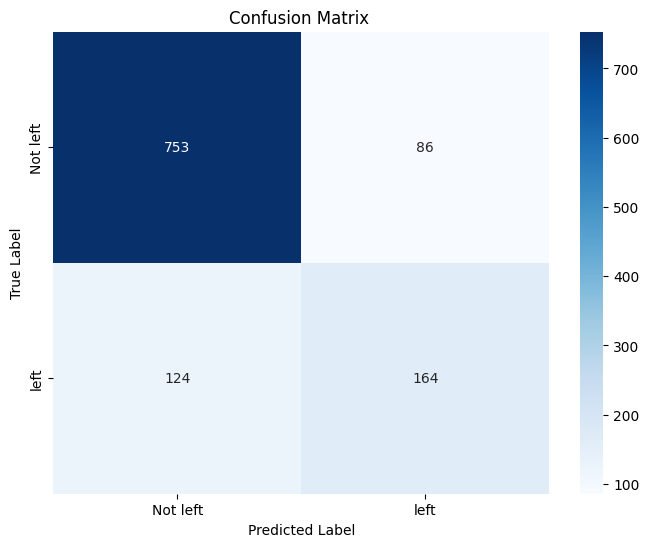

In [44]:
from sklearn.metrics import confusion_matrix


dval = xgb.DMatrix(x_val)
y_pred = bst.predict(dval)
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]


cm = confusion_matrix(y_val, y_pred_binary)
print("Confusion Matrix:\n", cm)
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not left', 'left'], yticklabels=['Not left', 'left'])
plt.title('Confusion Matrix ')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [45]:
# param_grid={
#     'max_depth':[3,4,5],
#     'learning_rate':[0.05,0.10,0.01],
#     'gamma':[0.0,0.25,1.0],
#     'reg_lambda':[0.0,1.0,10.0],
#     'scale_pos_weight':[1,3,5]
# }
# optimal_params=GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',seed=42,subsample=0.9,colsample_bytree=0.5),param_grid=param_grid,scoring='roc_auc',n_jobs=10,cv=5,verbose=2)
# optimal_params.fit(x_train,y_train)
# print("Best parameters:",optimal_params.best_params_)
# print("Best AUC-PR score:",optimal_params.best_score)

In [46]:
clf_xgb=xgb.XGBClassifier(objective='binary:logistic',seed=42,
                          gamma=0.25,
                          learn_rate=0.1,
                          max_depth=4,
                          reg_lamda=10,
                          scale_pos_weight=3,
                          subsample=0.9,
                          colsample_bytree=0.5,
                          n_estimators=1)
clf_xgb.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:30:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "learn_rate", "reg_lamda" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learn_rate=0.1, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1, n_jobs=None, ...)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report


y_pred = clf_xgb.predict(x_test)
y_pred_proba = clf_xgb.predict_proba(x_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[614 421]
 [ 62 312]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.59      0.72      1035
           1       0.43      0.83      0.56       374

    accuracy                           0.66      1409
   macro avg       0.67      0.71      0.64      1409
weighted avg       0.78      0.66      0.68      1409



In [48]:
from sklearn.metrics import confusion_matrix, classification_report


y_pred = clf_xgb.predict(x_test)
y_pred_proba = clf_xgb.predict_proba(x_test)[:, 1]  # Probabilities for AUC-PR


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[614 421]
 [ 62 312]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.59      0.72      1035
           1       0.43      0.83      0.56       374

    accuracy                           0.66      1409
   macro avg       0.67      0.71      0.64      1409
weighted avg       0.78      0.66      0.68      1409



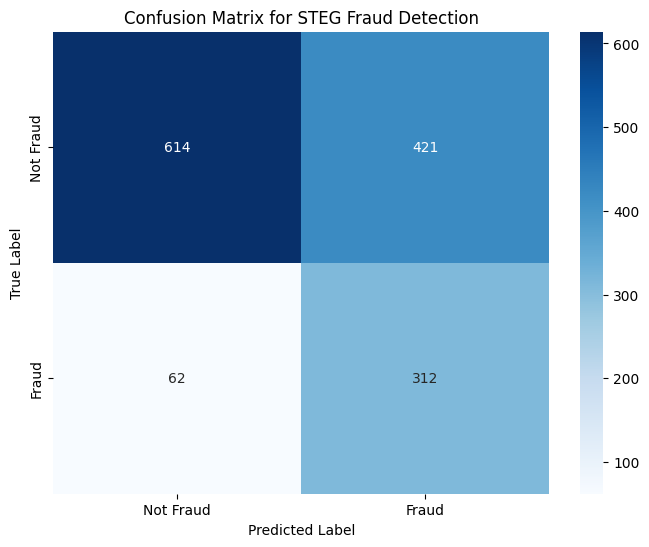

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for STEG Fraud Detection')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [50]:
# Retrain with corrected parameter
clf_xgb_corrected = xgb.XGBClassifier(
    objective='binary:logistic',
    seed=42,
    gamma=0.25,
    learning_rate=0.1,
    max_depth=4,
    reg_lambda=10,
    scale_pos_weight=2,
    subsample=0.9,
    colsample_bytree=0.5,
    n_estimators=50
)
clf_xgb_corrected.fit(x_train, y_train)

# Evaluate
y_pred_corrected = clf_xgb_corrected.predict(x_test)
cm_corrected = confusion_matrix(y_test, y_pred_corrected)
print("Corrected Confusion Matrix:\n", cm_corrected)
print("Corrected Classification Report:\n", classification_report(y_test, y_pred_corrected))

Corrected Confusion Matrix:
 [[817 218]
 [ 94 280]]
Corrected Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      1035
           1       0.56      0.75      0.64       374

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409



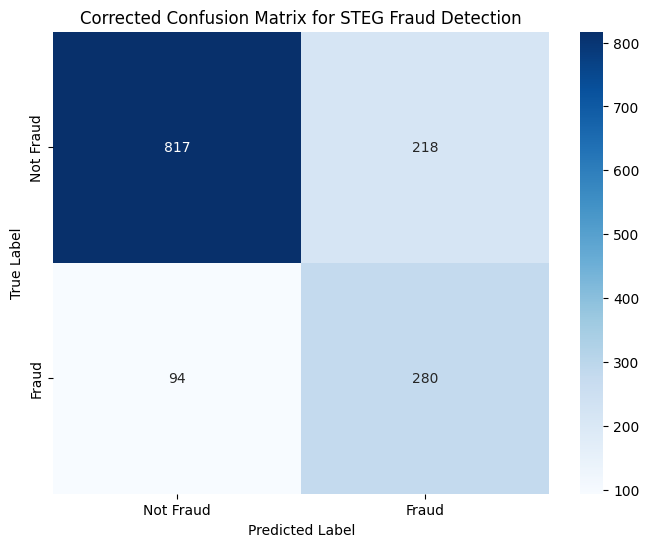

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot corrected confusion matrix
cm_corrected = [[817, 218], [94, 280]]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_corrected, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Corrected Confusion Matrix for STEG Fraud Detection')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()